<a href="https://colab.research.google.com/github/taianers/inteligencia-artificial-gcc128/blob/master/quiz_03_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 03 - Redes Neurais Artificiais

**GCC 128 - Inteligência Artificial**

Profº Eric Fernandes de Mello Araújo

Nome: Taiane Rodrigues de Sousa

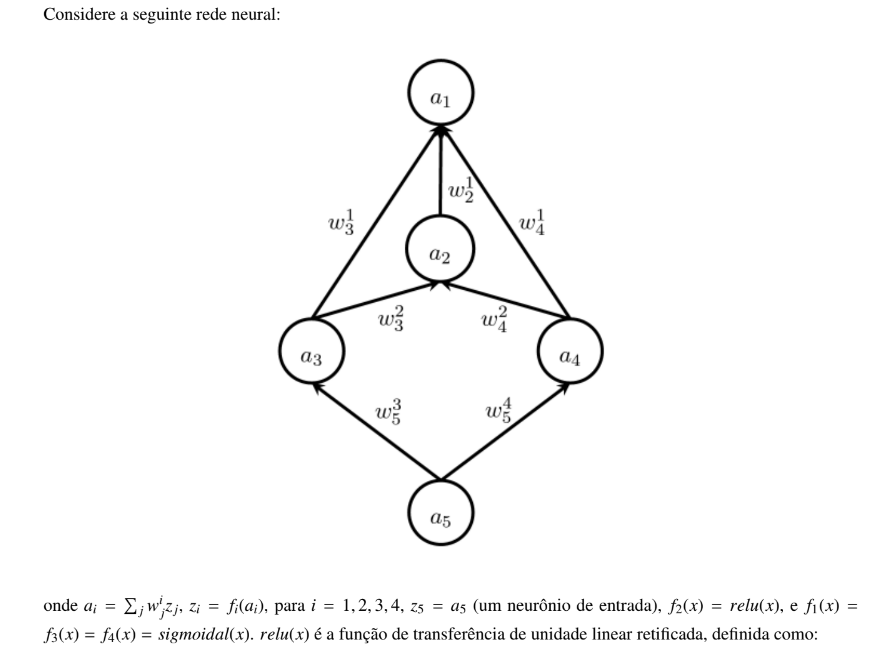

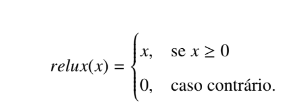

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def a5(x):
    return x

def a4(x, w):
    return sigmoid(a5(x) * w[5][4])

def a3(x, w):
    return sigmoid(a5(x) * w[5][3])

def a2(x, w):
    return relu(a3(x, w) * w[3][2] + a4(x, w) * w[4][2])

def a1(x, w):
    return sigmoid(a3(x, w) * w[3][1] + a2(x, w) * w[2][1] + a4(x, w) * w[4][1])

def derivada_relu(x):
    return 0 if x <= 0 else 1

def derivada_sigmoidal(x):
    return x * (1 - x)

def delta1(x, y, w):
    y1 = a1(x, w)
    return derivada_sigmoidal(y1) * (y - y1)

def delta2(x, y, w):
    y2 = a2(x, w)
    return derivada_relu(y2) * w[2][1] * delta1(x, y, w)

def delta3(x, y, w):
    y3 = a3(x, w)
    return derivada_sigmoidal(y3) * (w[3][2] * delta2(x, y, w) + w[3][1] * delta1(x, y, w))

def delta4(x, y, w):
    y4 = a4(x, w)
    return derivada_sigmoidal(y4) * (w[4][2] * delta2(x, y, w) + w[4][1] * delta1(x, y, w))

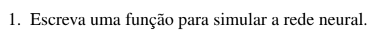

In [22]:
def forward_pass(x, w):
    z5 = x
    z4 = sigmoid(z5 * w[5][4])
    z3 = sigmoid(z5 * w[5][3])
    z2 = relu(z3 * w[3][2] + z4 * w[4][2])
    z1 = sigmoid(z3 * w[3][1] + z2 * w[2][1] + z4 * w[4][1])
    return z1, z2, z3, z4, z5

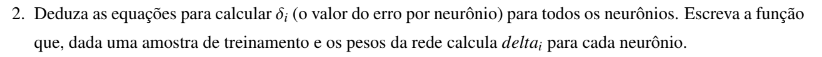

In [23]:
def backward_pass(x, y, w):
    z1, z2, z3, z4, z5 = forward_pass(x, w)

    delta_1 = delta1(x, y, w)
    delta_2 = delta2(x, y, w)
    delta_3 = delta3(x, y, w)
    delta_4 = delta4(x, y, w)

    return delta_1, delta_2, delta_3, delta_4

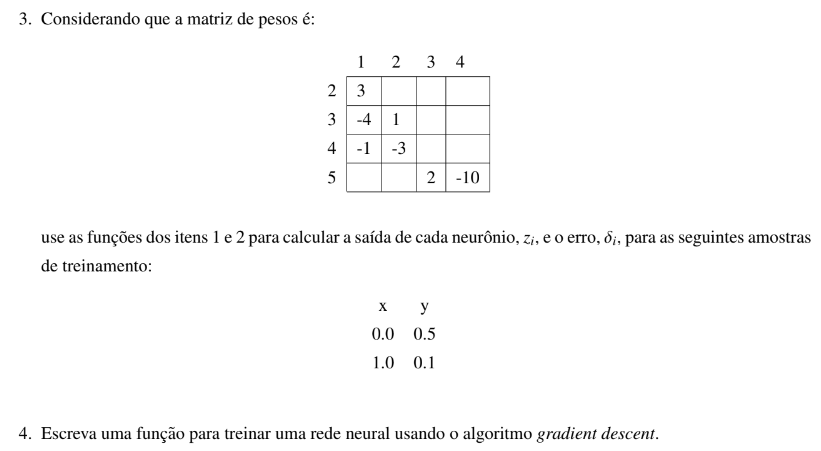

In [24]:
def gradient_descent(amostras, taxa_aprendizado, epocas):
    w = np.array([[0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0],
                  [0, 0, 3, 0, 0, 0],
                  [0, 0, -4, 1, 0, 0],
                  [0, 0, -1, -3, 0, 0],
                  [0, 0, 0, 0, 2, -10]])

    erros = []
    for _ in range(epocas):
        erro_total = 0
        for x, y in amostras:
            delta1, delta2, delta3, delta4 = backward_pass(x, y, w)

            w[1][2] += taxa_aprendizado * delta1 * a2(x, w)
            w[1][3] += taxa_aprendizado * delta1 * a3(x, w)
            w[1][4] += taxa_aprendizado * delta1 * a4(x, w)
            w[2][3] += taxa_aprendizado * delta2 * a3(x, w)
            w[2][4] += taxa_aprendizado * delta2 * a4(x, w)
            w[3][5] += taxa_aprendizado * delta3 * a5(x)
            w[4][5] += taxa_aprendizado * delta4 * a5(x)

            erro_total += forward_pass(x, w)[0] - y
        erros.append(erro_total)
    return w, erros

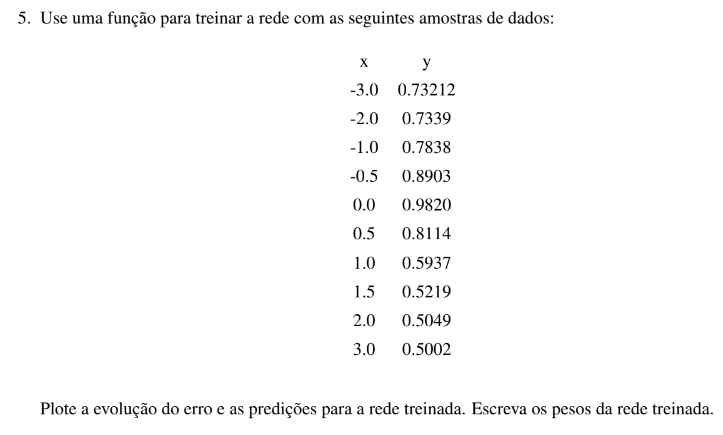

Pesos Treinados:
[[  0   0   0   0   0   0]
 [  0   0   0   0   0   0]
 [  0   0   3   0   0   0]
 [  0   0  -4   1   0   0]
 [  0   0  -1  -3   0   0]
 [  0   0   0   0   2 -10]]


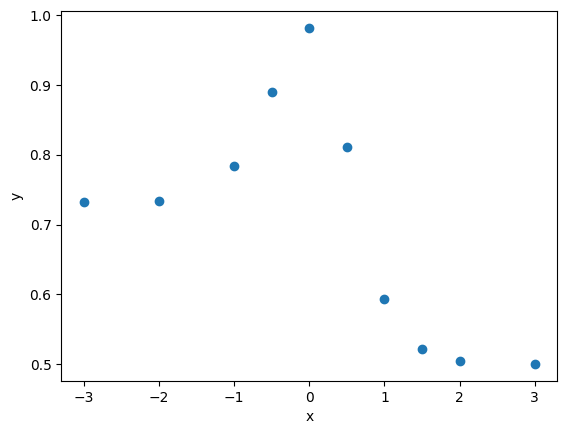

In [25]:
def plotar(amostras):
    plt.plot(amostras[:, 0], amostras[:, 1], 'o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def treinar_rede():
    amostras = np.array([[-3.0, 0.73212], [-2.0, 0.7339], [-1.0, 0.7838], [-0.5, 0.8903], [0.0, 0.9820], [0.5, 0.8114],
                         [1.0, 0.5937], [1.5, 0.5219], [2.0, 0.5049], [3.0, 0.5002]])

    pesos_treinados, erros = gradient_descent(amostras, 0.1, 1000)

    print("Pesos Treinados:")
    print(pesos_treinados)

    plotar(amostras)

treinar_rede()